In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [6]:
# Read csv file

signal_only = np.genfromtxt('Data/28062024_S1.6_500.csv', delimiter=',', skip_header=2)
background = np.genfromtxt('Data/28062024_B1.6_500.csv', delimiter=',', skip_header=2)
signal_control = np.genfromtxt('Data/28062024_O1.6_500.csv', delimiter=',', skip_header=2)

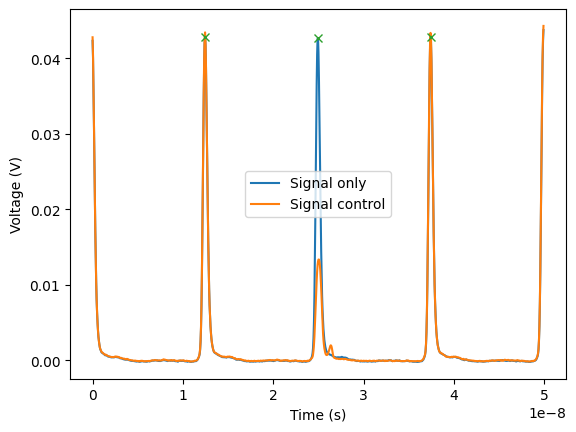

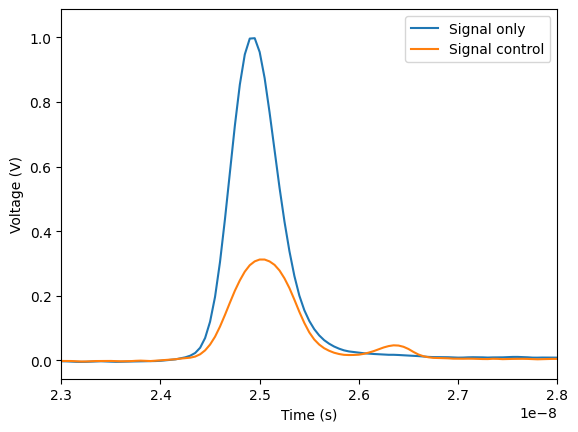

In [50]:
# Extract data

signal_only_time = signal_only[:,0]
signal_only_volt = signal_only[:,1]

background_time = background[:,0]
background_volt = background[:,1]

signal_control_time = signal_control[:,0]
signal_control_volt = signal_control[:,1]

# Subtract background

signal_only_volt = signal_only_volt - background_volt
signal_control_volt = signal_control_volt - background_volt

signal_only_time = signal_only_time - signal_only_time[0]
signal_control_time = signal_control_time - signal_control_time[0]

peaks, _ = find_peaks(signal_only_volt, distance=180, prominence=0.0001)
signal_only_max = np.mean(signal_only_volt[peaks])

signal_only_volt_norm = signal_only_volt / signal_only_max
signal_control_volt_norm = signal_control_volt / signal_only_max

# Plot

plt.plot(signal_only_time, signal_only_volt, label='Signal only')
plt.plot(signal_control_time, signal_control_volt, label='Signal control')
plt.plot(signal_only_time[peaks], signal_only_volt[peaks], 'x')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
# plt.xlim(2.3e-8, 2.8e-8)
plt.legend()
plt.show()

plt.plot(signal_only_time, signal_only_volt_norm, label='Signal only')
plt.plot(signal_control_time, signal_control_volt_norm, label='Signal control')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.xlim(2.3e-8, 2.8e-8)
plt.legend()
plt.show()



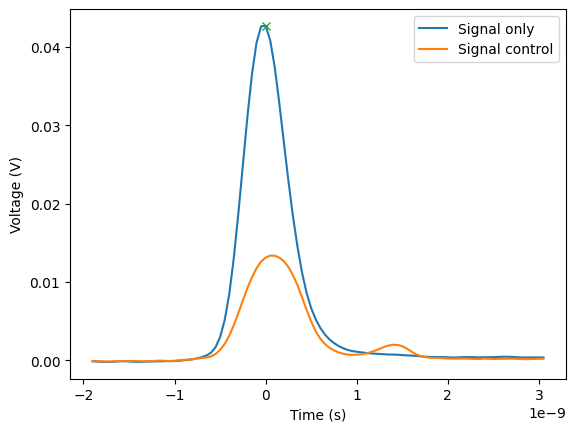

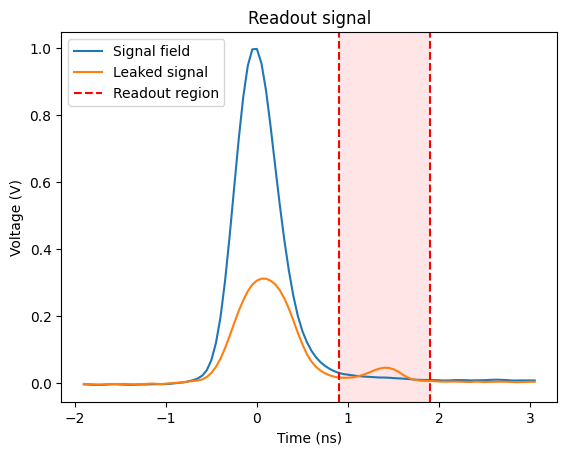

In [71]:
ROI = [2.3e-8, 2.8e-8]
ROI_idx = np.where((signal_only_time >= ROI[0]) & (signal_only_time <= ROI[1]))[0]

signal_only_volt_ROI = signal_only_volt[ROI_idx]
signal_control_volt_ROI = signal_control_volt[ROI_idx]

signal_only_volt_ROI_norm = signal_only_volt_ROI / signal_only_max
signal_control_volt_ROI_norm = signal_control_volt_ROI / signal_only_max

time_signal_only = signal_only_time[ROI_idx] - signal_only_time[ROI_idx][0]
time_signal_control = signal_control_time[ROI_idx] - signal_control_time[ROI_idx][0]

peak, _ = find_peaks(signal_only_volt_ROI, distance=180, prominence=0.0001)
peak_norm, _ = find_peaks(signal_only_volt_ROI_norm, distance=180, prominence=0.0001)

time_peak = time_signal_only[peak]
time_peak_norm = time_signal_only[peak_norm]

time_singal_only_centralised = time_signal_only - time_peak
time_singal_only_centralised_norm = time_signal_only - time_peak_norm


plt.plot(time_singal_only_centralised, signal_only_volt_ROI, label='Signal only')
plt.plot(time_singal_only_centralised, signal_control_volt_ROI, label='Signal control')
plt.plot(time_singal_only_centralised[peak], signal_only_volt_ROI[peak], 'x')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

plt.plot(time_singal_only_centralised_norm*1e9, signal_only_volt_ROI_norm, label='Signal field')
plt.plot(time_singal_only_centralised_norm*1e9, signal_control_volt_ROI_norm, label='Leaked signal')
# plt.plot(time_singal_only_centralised_norm[peak_norm], signal_only_volt_ROI_norm[peak_norm], 'x')
plt.axvline(x=0.9, color='r', linestyle='--', label='Readout region')
plt.axvline(x=1.9, color='r', linestyle='--')
plt.axvspan(0.9, 1.9, color='r', alpha=0.1, lw=0)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('Readout signal')
plt.legend()
plt.show()